
 # Analyse des Prix des Actions et Tests de Stationnarité
 Ce notebook explore la stationnarité des prix de clôture et des rendements des actions en utilisant des données de Yahoo Finance. Nous effectuons des tests statistiques, notamment les tests de Dickey-Fuller augmenté (ADF) et KPSS, et visualisons les résultats.


 ## Étape 1 : Importation des Bibliothèques Nécessaires
 Nous commençons par importer les bibliothèques Python nécessaires pour récupérer, traiter et visualiser les données.

In [1]:
import yfinance as yf  # Pour récupérer les données boursières
import pandas as pd  # Pour manipuler les données
import matplotlib.pyplot as plt  # Pour visualiser les données
from statsmodels.tsa.stattools import adfuller, kpss  # Pour les tests de stationnarité
import warnings  # Pour gérer les avertissements

 ## Étape 2 : Récupération des Prix de Clôture
 Nous récupérons les prix de clôture historiques pour l'action choisie en utilisant la bibliothèque `yfinance`.

In [2]:
# Définir le ticker de l'action et la plage de dates
ticker = "MSFT"  # Action Microsoft
# start_date = "2015-01-01"
# end_date = "2025-01-01"
start_date = "2024-01-01"
end_date = "2025-01-01"

# Récupérer les prix de clôture
data = yf.download(ticker, start=start_date, end=end_date)
close_prices = data["Close"]

# Afficher les premières lignes des données
close_prices.head()

[*********************100%***********************]  1 of 1 completed


Ticker,MSFT
Date,
2024-01-02,368.117249
2024-01-03,367.849274
2024-01-04,365.209015
2024-01-05,365.020416
2024-01-08,371.908905



 ## Étape 3 : Calcul des Rendements
 Nous calculons les rendements quotidiens en pourcentage à partir des prix de clôture. Les rendements représentent la variation relative du prix de l'action.

In [3]:
# Calculer les rendements quotidiens
returns = close_prices.pct_change().dropna()

# Afficher les premières lignes des rendements
returns.head()

Ticker,MSFT
Date,
2024-01-03,-0.000728
2024-01-04,-0.007178
2024-01-05,-0.000516
2024-01-08,0.018872
2024-01-09,0.002936



 ## Étape 4 : Tests de Stationnarité
 ### Test de Dickey-Fuller Augmenté (ADF)
 Le test ADF vérifie la présence d'une racine unitaire dans une série temporelle. Si la p-value est inférieure à 0.05, la série est considérée comme stationnaire.

 ### Test KPSS
 Le test KPSS vérifie si une série est stationnaire autour d'une tendance déterministe. Si la p-value est supérieure à 0.05, la série est considérée comme stationnaire.

In [4]:
# Effectuer le test ADF pour les prix de clôture
adf_test_close = adfuller(close_prices.dropna(), autolag="AIC")
adf_result_close = {
    "Test Statistic": adf_test_close[0],
    "p-value": adf_test_close[1],
    "Critical Values": adf_test_close[4],
}

# Effectuer le test KPSS pour les prix de clôture
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    kpss_test_close = kpss(close_prices.dropna(), regression="c", nlags="auto")
kpss_result_close = {
    "Test Statistic": kpss_test_close[0],
    "p-value": kpss_test_close[1],
    "Critical Values": kpss_test_close[3],
}

# Afficher les résultats pour les prix de clôture
adf_result_close, kpss_result_close

({'Test Statistic': -3.1964520070354308,
  'p-value': 0.02019097172331013,
  'Critical Values': {'1%': -3.4566744514553016,
   '5%': -2.8731248767783426,
   '10%': -2.5729436702592023}},
 {'Test Statistic': 0.8144418259921269,
  'p-value': 0.01,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}})

In [5]:
# Effectuer le test ADF pour les rendements
adf_test_returns = adfuller(returns, autolag="AIC")
adf_result_returns = {
    "Test Statistic": adf_test_returns[0],
    "p-value": adf_test_returns[1],
    "Critical Values": adf_test_returns[4],
}

# Effectuer le test KPSS pour les rendements
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    kpss_test_returns = kpss(returns, regression="c", nlags="auto")
kpss_result_returns = {
    "Test Statistic": kpss_test_returns[0],
    "p-value": kpss_test_returns[1],
    "Critical Values": kpss_test_returns[3],
}

# Afficher les résultats pour les rendements
adf_result_returns, kpss_result_returns

({'Test Statistic': -12.259749763650776,
  'p-value': 9.136183202126815e-23,
  'Critical Values': {'1%': -3.4568881317725864,
   '5%': -2.8732185133016057,
   '10%': -2.5729936189738876}},
 {'Test Statistic': 0.14309933100629763,
  'p-value': 0.1,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}})

In [6]:
# Fonction pour interpréter les résultats de stationnarité
def interpret_stationarity(adf_result, kpss_result, series_name):
    print(f"\n=== Résultats des Tests de Stationnarité pour {series_name} ===")

    # Interprétation du test ADF
    if adf_result["p-value"] < 0.05:
        print(
            f"Test ADF : {series_name} est stationnaire (p-value = {adf_result['p-value']:.4f})."
        )
    else:
        print(
            f"Test ADF : {series_name} est non stationnaire (p-value = {adf_result['p-value']:.4f})."
        )

    # Interprétation du test KPSS
    if kpss_result["p-value"] > 0.05:
        print(
            f"Test KPSS : {series_name} est stationnaire (p-value = {kpss_result['p-value']:.4f})."
        )
    else:
        print(
            f"Test KPSS : {series_name} est non stationnaire (p-value = {kpss_result['p-value']:.4f})."
        )


# Interpréter les résultats pour les prix de clôture
interpret_stationarity(adf_result_close, kpss_result_close, "Prix de Clôture")

# Interpréter les résultats pour les rendements
interpret_stationarity(adf_result_returns, kpss_result_returns, "Rendements")


=== Résultats des Tests de Stationnarité pour Prix de Clôture ===
Test ADF : Prix de Clôture est stationnaire (p-value = 0.0202).
Test KPSS : Prix de Clôture est non stationnaire (p-value = 0.0100).

=== Résultats des Tests de Stationnarité pour Rendements ===
Test ADF : Rendements est stationnaire (p-value = 0.0000).
Test KPSS : Rendements est stationnaire (p-value = 0.1000).



 ## Étape 5 : Visualisation des Données
 ### Prix de Clôture
 Nous visualisons la série temporelle des prix de clôture pour comprendre les tendances et le comportement.

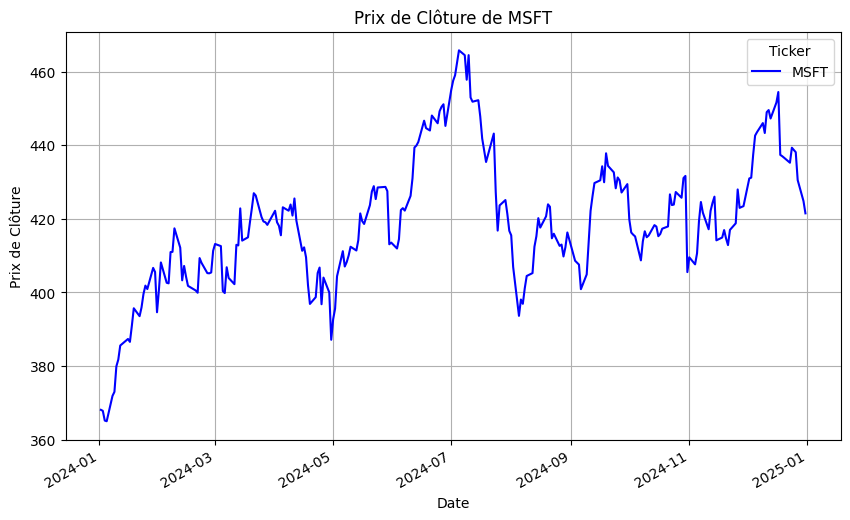

In [7]:
# Tracer les prix de clôture
close_prices.plot(title=f"Prix de Clôture de {ticker}", color="blue", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Prix de Clôture")
plt.grid()
plt.show()


 ### Rendements
 Nous traçons la série temporelle des rendements quotidiens pour observer leur distribution et leurs tendances.

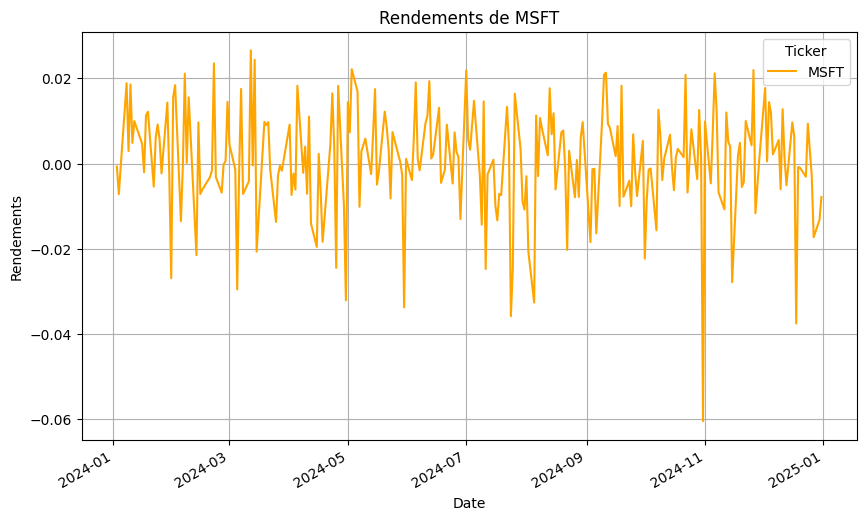

In [8]:
# Tracer les rendements
returns.plot(title=f"Rendements de {ticker}", color="orange", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Rendements")
plt.grid()
plt.show()

 ## Étape 6 : Visualisation de la Distribution des Prix de Clôture et des Rendements
 Nous utilisons des histogrammes et des courbes de densité pour observer la distribution des prix de clôture et des rendements.

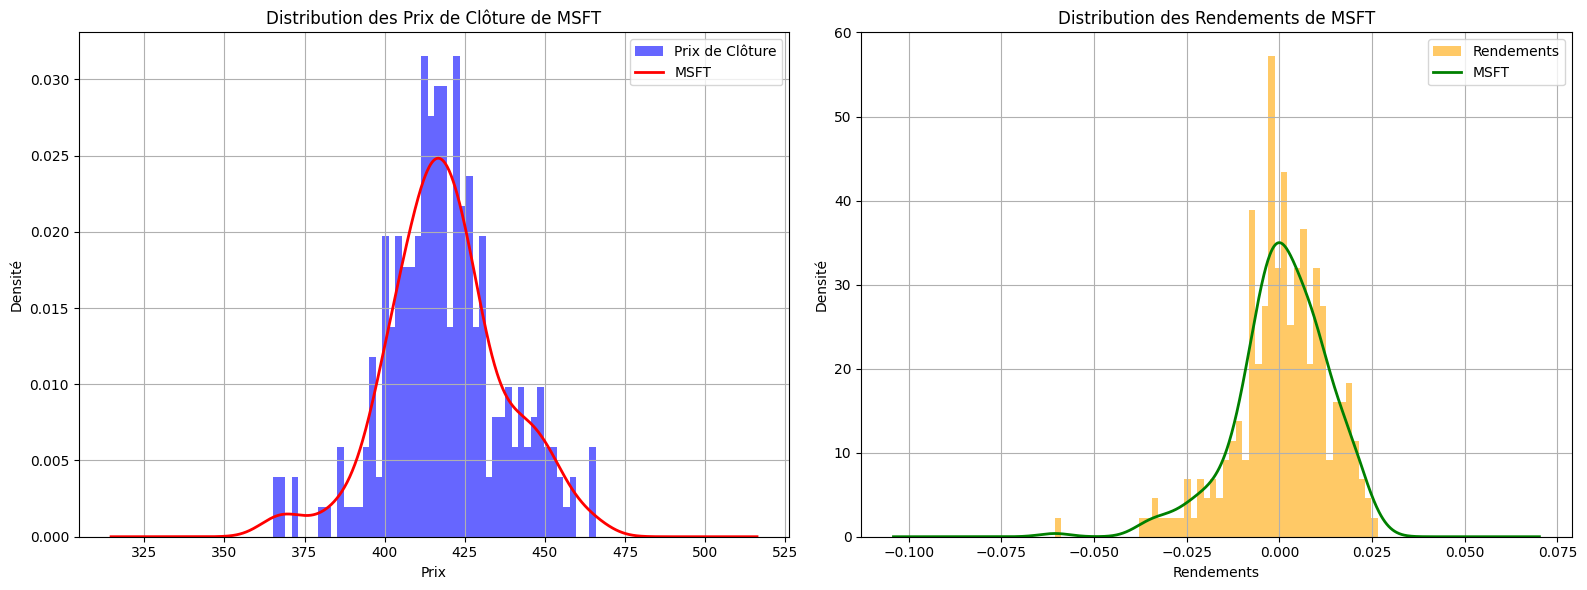

In [9]:
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tracer la distribution des prix de clôture sur le premier sous-graphique
axes[0].hist(
    close_prices,
    bins=50,
    color="blue",
    alpha=0.6,
    density=True,
    label="Prix de Clôture",
)
close_prices.plot(kind="kde", color="red", label="KDE", lw=2, ax=axes[0])
axes[0].set_title(f"Distribution des Prix de Clôture de {ticker}")
axes[0].set_xlabel("Prix")
axes[0].set_ylabel("Densité")
axes[0].legend()
axes[0].grid()

# Tracer la distribution des rendements sur le deuxième sous-graphique
axes[1].hist(
    returns, bins=50, color="orange", alpha=0.6, density=True, label="Rendements"
)
returns.plot(kind="kde", color="green", label="KDE", lw=2, ax=axes[1])
axes[1].set_title(f"Distribution des Rendements de {ticker}")
axes[1].set_xlabel("Rendements")
axes[1].set_ylabel("Densité")
axes[1].legend()
axes[1].grid()

# Afficher les graphiques
plt.tight_layout()
plt.show()

 ## Conclusion
 D'après les tests de stationnarité :
 - Les prix de clôture sont non stationnaires, comme indiqué par les tests ADF et KPSS.
 - Les rendements sont stationnaires, ce qui suggère qu'ils peuvent être utilisés pour une modélisation ultérieure en séries temporelles.

 Les visualisations fournissent une compréhension intuitive des tendances des prix de clôture et des rendements.